# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress 


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
outputcities = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units ="imperial"

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:

query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + cities[0]).json()

response

{'coord': {'lon': 26.89, 'lat': -33.59},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 63.79,
  'feels_like': 57.7,
  'temp_min': 63.79,
  'temp_max': 63.79,
  'pressure': 1023,
  'humidity': 55,
  'sea_level': 1023,
  'grnd_level': 1020},
 'visibility': 10000,
 'wind': {'speed': 9.71, 'deg': 9},
 'clouds': {'all': 0},
 'dt': 1595463745,
 'sys': {'country': 'ZA', 'sunrise': 1595481020, 'sunset': 1595518031},
 'timezone': 7200,
 'id': 964432,
 'name': 'Port Alfred',
 'cod': 200}

In [15]:
lat = []
lng=[]
temp=[]
maxtemp = []
humidity=[]
cloudiness=[]
windspeed=[]
country=[]
date=[]
newcities=[]

record=1
setcounter=1

# Build partial query URL
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

print ("Beginning Data Retrieval")     
print ("-----------------------------")
for city in cities:
    if record > 50:
        setcounter +=1
        record = 1
    print (f"Processing Record {record} of Set {setcounter} | {city}")
    record +=1
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        maxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        newcities.append(city)
        
    except:
        print ("City not found. Skipping...")                        
        pass
    

    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | bubaque
Processing Record 3 of Set 1 | seoni malwa
Processing Record 4 of Set 1 | bhanvad
Processing Record 5 of Set 1 | aporawan
City not found. Skipping...
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | san quintin
Processing Record 8 of Set 1 | karratha
Processing Record 9 of Set 1 | raahe
Processing Record 10 of Set 1 | cockburn town
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | kizukuri
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | cabedelo
Processing Record 15 of Set 1 | morro bay
Processing Record 16 of Set 1 | chuy
Processing Record 17 of Set 1 | chicama
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | arlit
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Record 21 of Set 1 | taltal
Processing Record 22 of Set 1 | rikitea


Processing Record 44 of Set 4 | trinidad
Processing Record 45 of Set 4 | samusu
City not found. Skipping...
Processing Record 46 of Set 4 | tshikapa
Processing Record 47 of Set 4 | castro
Processing Record 48 of Set 4 | hami
Processing Record 49 of Set 4 | airai
Processing Record 50 of Set 4 | chapais
Processing Record 1 of Set 5 | lagos
Processing Record 2 of Set 5 | ahipara
Processing Record 3 of Set 5 | san vicente
Processing Record 4 of Set 5 | xiongyue
Processing Record 5 of Set 5 | idlib
Processing Record 6 of Set 5 | maldonado
Processing Record 7 of Set 5 | hambantota
Processing Record 8 of Set 5 | grand gaube
Processing Record 9 of Set 5 | verkhnevilyuysk
Processing Record 10 of Set 5 | rungata
City not found. Skipping...
Processing Record 11 of Set 5 | nanortalik
Processing Record 12 of Set 5 | ucluelet
Processing Record 13 of Set 5 | luderitz
Processing Record 14 of Set 5 | rodos
Processing Record 15 of Set 5 | bowen
Processing Record 16 of Set 5 | borovskoy
Processing Record

City not found. Skipping...
Processing Record 31 of Set 8 | morondava
Processing Record 32 of Set 8 | college
Processing Record 33 of Set 8 | aksu
Processing Record 34 of Set 8 | kushima
Processing Record 35 of Set 8 | bontang
Processing Record 36 of Set 8 | kadoshkino
Processing Record 37 of Set 8 | bambous virieux
Processing Record 38 of Set 8 | tonantins
Processing Record 39 of Set 8 | sibu
Processing Record 40 of Set 8 | hovd
Processing Record 41 of Set 8 | dandong
Processing Record 42 of Set 8 | maceio
Processing Record 43 of Set 8 | nikel
Processing Record 44 of Set 8 | emba
Processing Record 45 of Set 8 | derzhavinsk
Processing Record 46 of Set 8 | seoul
Processing Record 47 of Set 8 | margate
Processing Record 48 of Set 8 | longlac
City not found. Skipping...
Processing Record 49 of Set 8 | costinesti
Processing Record 50 of Set 8 | salalah
Processing Record 1 of Set 9 | svetlyy
Processing Record 2 of Set 9 | abnub
Processing Record 3 of Set 9 | alvorada
Processing Record 4 of 

Processing Record 18 of Set 12 | ostrovnoy
Processing Record 19 of Set 12 | broken hill
Processing Record 20 of Set 12 | temaraia
City not found. Skipping...
Processing Record 21 of Set 12 | murray bridge
Processing Record 22 of Set 12 | artyk
City not found. Skipping...
Processing Record 23 of Set 12 | gobabis
Processing Record 24 of Set 12 | oudtshoorn
Processing Record 25 of Set 12 | ovsyanka
Processing Record 26 of Set 12 | progreso
Processing Record 27 of Set 12 | hirado
Processing Record 28 of Set 12 | nerchinskiy zavod
Processing Record 29 of Set 12 | benjamin hill
Processing Record 30 of Set 12 | mount pleasant
Processing Record 31 of Set 12 | bafq
Processing Record 32 of Set 12 | barahona
Processing Record 33 of Set 12 | chardara
Processing Record 34 of Set 12 | navirai
Processing Record 35 of Set 12 | caucaia
Processing Record 36 of Set 12 | tura
Processing Record 37 of Set 12 | itoman
Processing Record 38 of Set 12 | slave lake
Processing Record 39 of Set 12 | agadir
Process

In [13]:
print (maxtemp)

[]


In [17]:

weatherdf=pd.DataFrame({"City":newcities,
              "Latitude":lat,
              'Longitude':lng,
            "Max Temp": maxtemp,
             'Humidity': humidity,
             'Cloudiness': cloudiness,
             "Wind Speed": windspeed,
             "Country": country,
             "Date": date})
weatherdf

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.59,26.89,64.49,44,0,9.73,ZA,1595466755
1,bubaque,11.28,-15.83,80.87,82,100,10.04,GW,1595466723
2,seoni malwa,22.45,77.47,80.06,81,100,3.69,IN,1595466755
3,bhanvad,21.93,69.77,80.92,84,94,8.72,IN,1595466755
4,san quintin,30.48,-115.95,67.86,76,35,16.13,MX,1595466756
...,...,...,...,...,...,...,...,...,...
554,redmond,47.67,-122.12,70.00,74,23,3.85,US,1595466621
555,bukan,36.52,46.21,68.09,26,0,1.25,IR,1595466892
556,jishou,28.32,109.72,82.63,74,95,3.58,CN,1595466892
557,poya,-21.35,165.15,71.22,62,83,6.93,NC,1595466892


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
weatherdf.count()

City          559
Latitude      559
Longitude     559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
weatherdf.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,20.679338,21.955886,68.779141,71.475850,50.543828,7.863864,1.595467e+09
std,33.682654,91.449762,13.168073,19.329969,40.827697,5.225778,9.453681e+01
min,-54.800000,-179.170000,14.000000,3.000000,0.000000,0.360000,1.595466e+09
25%,-8.025000,-58.260000,59.070000,61.000000,1.000000,3.940000,1.595467e+09
50%,26.000000,27.870000,70.120000,75.000000,58.000000,6.930000,1.595467e+09
75%,50.300000,105.050000,78.800000,87.000000,91.000000,10.290000,1.595467e+09
max,78.220000,179.320000,104.000000,100.000000,100.000000,28.860000,1.595467e+09


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

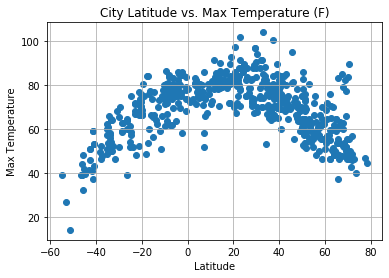

In [20]:
plt.scatter(x=weatherdf['Latitude'], y=weatherdf['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid()
plt.title('City Latitude vs. Max Temperature (F)')
plt.show()



## Latitude vs. Humidity Plot

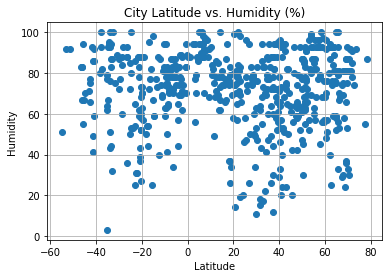

In [21]:
plt.scatter(x=weatherdf['Latitude'], y=weatherdf['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity (%)')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

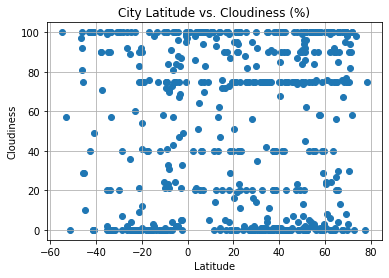

In [22]:
plt.scatter(x=weatherdf['Latitude'], y=weatherdf['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness (%)')
plt.grid()
plt.show()

plt.show()

## Latitude vs. Wind Speed Plot

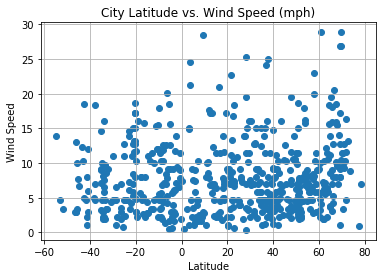

In [23]:
plt.scatter(x=weatherdf['Latitude'], y=weatherdf['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed (mph)')
plt.grid()
plt.show()

## Linear Regression

In [24]:
# Define function for creating linear agression and scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")

NameError: name 'x_values' is not defined

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_agression(x,y):
    print(f"The r-squared is : {rvalue**2}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq
                       
line_eq

In [27]:
# Create Northern and Southern Hemisphere DataFrames
nhem = weatherdf.loc[weatherdf["Latitude"] >= 0]
shem = weatherdf.loc[weatherdf["Latitude"] < 0]
nhem
shem

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.59,26.89,64.49,44,0,9.73,ZA,1595466755
5,karratha,-20.74,116.85,73.44,39,0,11.61,AU,1595466756
10,vaini,-21.20,-175.20,71.60,83,75,14.99,TO,1595466757
11,cabedelo,-6.98,-34.83,73.40,83,4,6.93,BR,1595466757
13,chuy,-33.70,-53.46,64.17,94,100,6.55,UY,1595466758
...,...,...,...,...,...,...,...,...,...
545,daru,-9.08,143.21,78.30,81,100,11.77,PG,1595466889
547,maumere,-8.62,122.21,80.06,65,33,4.85,ID,1595466890
548,ambilobe,-13.20,49.05,62.11,73,100,3.42,MG,1595466890
551,coolum beach,-26.53,153.10,60.01,88,100,3.00,AU,1595466891


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 380 and the array at index 1 has size 179

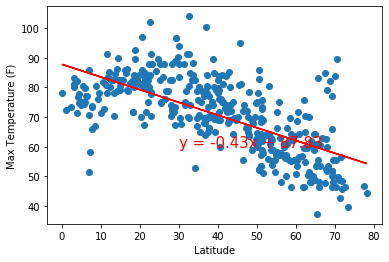

The r-squared is: 0.4394222591003256


In [52]:

x_values = nhem['Latitude']
y_values = nhem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

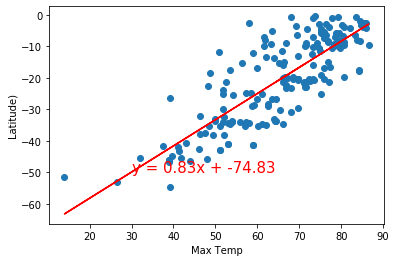

The r-squared is: 0.6680379004576606


In [50]:
x_values = shem['Max Temp']
y_values = shem['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,-50),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Latitude)')
plt.show()
print(f"The r-squared is: {rvalue**2}")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

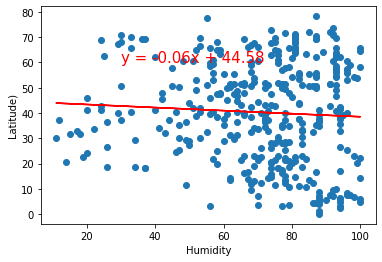

The r-squared is: 0.0038226767283183346


In [49]:
x_values = nhem['Humidity']
y_values = nhem['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,60),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude)')
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

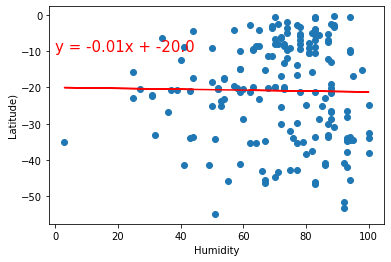

The r-squared is: 0.0002602042515892574


In [45]:
x_values = shem['Humidity']
y_values = shem['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-10),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude)')
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

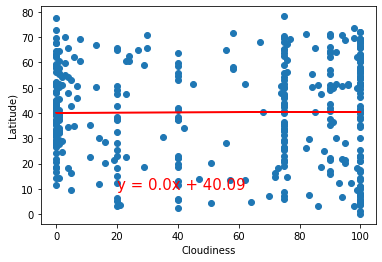

The r-squared is: 4.469278212483962e-05


In [53]:
x_values = nhem['Cloudiness']
y_values = nhem['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude)')
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

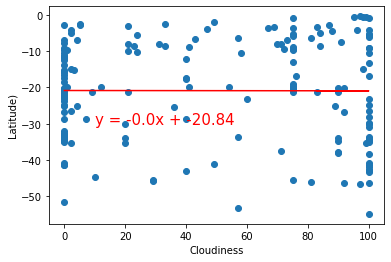

The r-squared is: 7.354761918521854e-06


In [56]:
x_values = shem['Cloudiness']
y_values = shem['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-30),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude)')
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

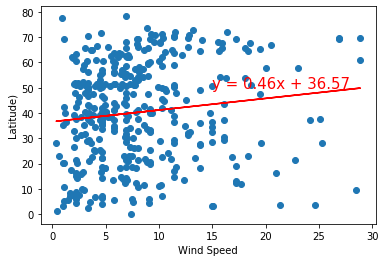

The r-squared is: 0.016550007647509597


In [60]:
x_values = nhem['Wind Speed']
y_values = nhem['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,50),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude)')
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

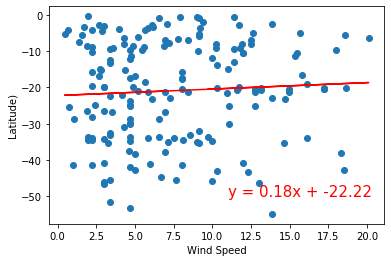

The r-squared is: 0.003646944170280066


In [64]:
x_values = shem['Wind Speed']
y_values = shem['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(11,-50),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude)')
plt.show()
print(f"The r-squared is: {rvalue**2}")